In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)
os.chdir('gdrive')
os.chdir('MyDrive')

Mounted at /content/gdrive


/content/gdrive/MyDrive


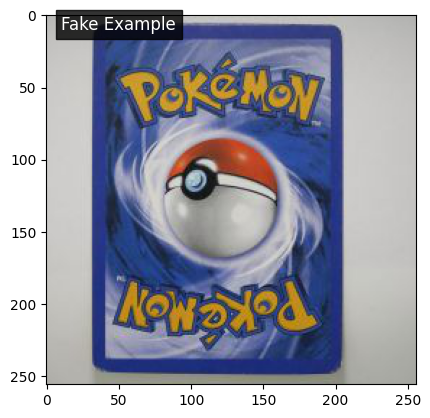

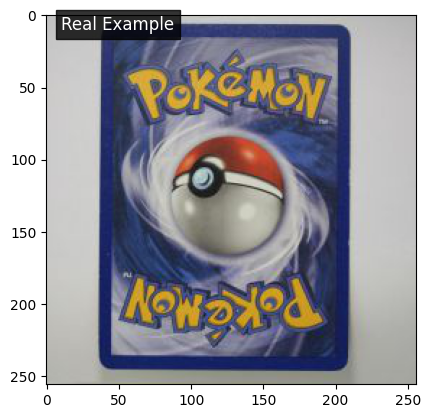

Number of instances in X: 373
Number of instances in y: 373
Epoch 1/9
12/12 [==============================] - 4s 199ms/step - loss: 6.4855 - accuracy: 0.7078 - val_loss: 0.3505 - val_accuracy: 0.8205
Epoch 2/9
12/12 [==============================] - 2s 186ms/step - loss: 0.4147 - accuracy: 0.7319 - val_loss: 0.4638 - val_accuracy: 0.7179
Epoch 3/9
12/12 [==============================] - 2s 187ms/step - loss: 0.3670 - accuracy: 0.8204 - val_loss: 0.2993 - val_accuracy: 0.8333
Epoch 4/9
12/12 [==============================] - 2s 180ms/step - loss: 0.2516 - accuracy: 0.9464 - val_loss: 0.2474 - val_accuracy: 0.8718
Epoch 5/9
12/12 [==============================] - 2s 192ms/step - loss: 0.1686 - accuracy: 0.9410 - val_loss: 0.1612 - val_accuracy: 0.9615
Epoch 6/9
12/12 [==============================] - 2s 183ms/step - loss: 0.0988 - accuracy: 0.9759 - val_loss: 0.0788 - val_accuracy: 0.9744
Epoch 7/9
12/12 [==============================] - 2s 188ms/step - loss: 0.0366 - accuracy: 0.

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPool2D, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import set_random_seed
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from skimage.io import imread
import tensorflow as tf
import sys
from numpy.random import seed
import os

#Set seed for (almost) consistent results

seed(34)
set_random_seed(34)

print(os.getcwd())
def numerical_sort(value):
    return int(value.split(".")[0])

#Load dataset train and test sets

captions = pd.read_csv("train_labels.csv")
captionst = pd.read_csv("test_labels.csv")

def loader(directory):
    pics = []
    for i in sorted(os.listdir(directory), key=numerical_sort):
        if ".JPG" in i:
            ip = imread(str(directory) + "/" + i)
            pics.append(ip)
    return np.array(pics)
pics = loader("train")
picst = loader("test")

y = captions["label"]
X = pics
yt = captionst["label"]
Xt = picst

#Show example images

plt.imshow(X[0])
plt.text(10, 10, "Fake Example", fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.8))
plt.show()
plt.imshow(X[125])
plt.text(10, 10, "Real Example", fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.8))
plt.show()


#Initialize model

model = Sequential()
print("Number of instances in X:", X.shape[0])
print("Number of instances in y:", y.shape[0])

#Convolutional layers

model.add(Conv2D(64, 3, activation = 'relu', input_shape = (256, 256, 3)))
model.add(Conv2D(32, 3, activation = 'relu'))
model.add(Conv2D(16, 3, activation = 'relu'))

#Pool, dropout, flatten, and output

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(1, activation = "sigmoid"))

#Train and evaluate

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=9, validation_data=(Xt, yt))

loss, accuracy = model.evaluate(X, y)
losst, accuracyt = model.evaluate(Xt, yt)

print("Accuracy:", accuracy)
print("Test Accuracy:", accuracyt)